In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost import XGBClassifier


In [4]:
train_data=pd.read_csv('train_dataset_final1.csv')

In [5]:
train_data

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,30259,1,1,2,90000,33.0,0,0,0,0,...,90042.87,2800.18,3999.97,8000.09,5347.85,3699.98,3128.06,82312.50,0.05,0
25243,30260,1,0,2,60000,49.0,0,0,0,0,...,19204.07,22000.17,2187.56,2501.13,2512.09,4004.89,2604.22,41371.67,0.14,1
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,...,9834.64,1315.83,1315.60,533.08,4116.08,9834.10,7100.12,3071.83,1.31,1
25245,30262,1,1,4,390000,40.0,0,0,0,0,...,199013.32,7636.03,5652.86,5544.67,5532.37,5859.09,6818.14,197278.83,0.03,0


In [6]:
train_data.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [8]:
train_data.isnull().sum()

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

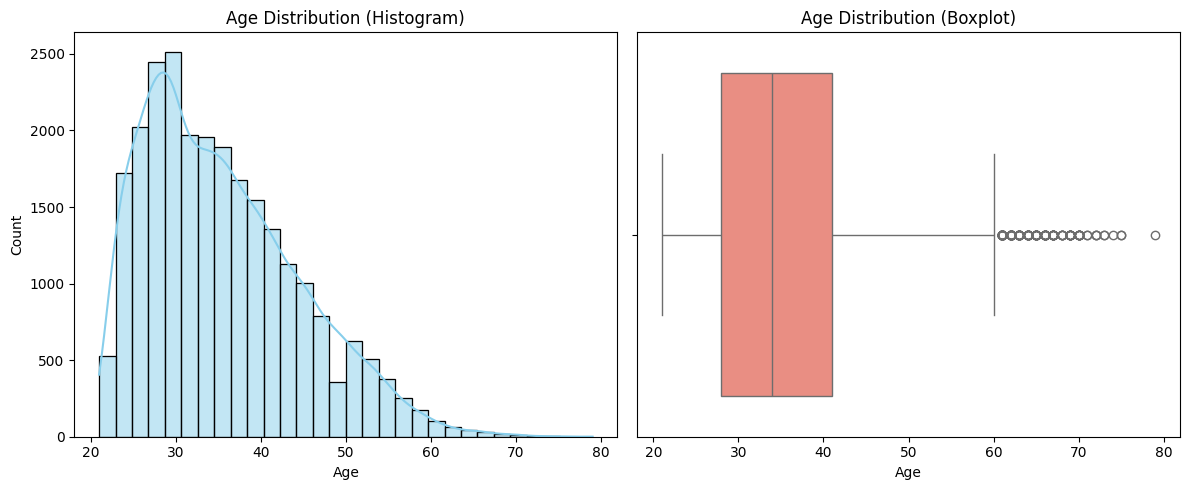

In [11]:
# Plot histogram and boxplot side by side
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(train_data['age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Age Distribution (Histogram)')
plt.xlabel('Age')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=train_data['age'], color='salmon')
plt.title('Age Distribution (Boxplot)')
plt.xlabel('Age')

plt.tight_layout()
plt.show()


In [12]:
# Calculate the median age
median_age = train_data['age'].median()

# Fill missing values in 'age' with the median
train_data['age'].fillna(median_age, inplace=True)


C:\Users\anujm\AppData\Local\Temp\ipykernel_6280\941365533.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['age'].fillna(median_age, inplace=True)


In [13]:
train_data.isnull().sum()


Customer_ID           0
marriage              0
sex                   0
education             0
LIMIT_BAL             0
age                   0
pay_0                 0
pay_2                 0
pay_3                 0
pay_4                 0
pay_5                 0
pay_6                 0
Bill_amt1             0
Bill_amt2             0
Bill_amt3             0
Bill_amt4             0
Bill_amt5             0
Bill_amt6             0
pay_amt1              0
pay_amt2              0
pay_amt3              0
pay_amt4              0
pay_amt5              0
pay_amt6              0
AVG_Bill_amt          0
PAY_TO_BILL_ratio     0
next_month_default    0
dtype: int64

In [14]:
train_data['education'].value_counts()


education
2    11717
1     8988
3     4115
5      253
4      116
6       44
0       14
Name: count, dtype: int64

In [15]:
train_data['education'].unique()


array([2, 1, 3, 4, 5, 6, 0], dtype=int64)

In [16]:
train_data['marriage'].value_counts()

marriage
2    13441
1    11480
3      273
0       53
Name: count, dtype: int64

In [17]:
train_data['sex'].value_counts()

sex
1    15252
0     9995
Name: count, dtype: int64

In [18]:
# Fix education: group unknown levels into 'Others' (code 4)
train_data['education'] = train_data['education'].replace([0, 5, 6], 4)

# Fix marriage: group unknown level 0 into 'Others' (code 3)
train_data['marriage'] = train_data['marriage'].replace(0, 3)


In [19]:
train_data['marriage'].value_counts()

marriage
2    13441
1    11480
3      326
Name: count, dtype: int64

In [20]:
train_data['education'].value_counts()

education
2    11717
1     8988
3     4115
4      427
Name: count, dtype: int64

In [21]:
train_data['next_month_default'].value_counts(normalize=True)

next_month_default
0    0.809601
1    0.190399
Name: proportion, dtype: float64

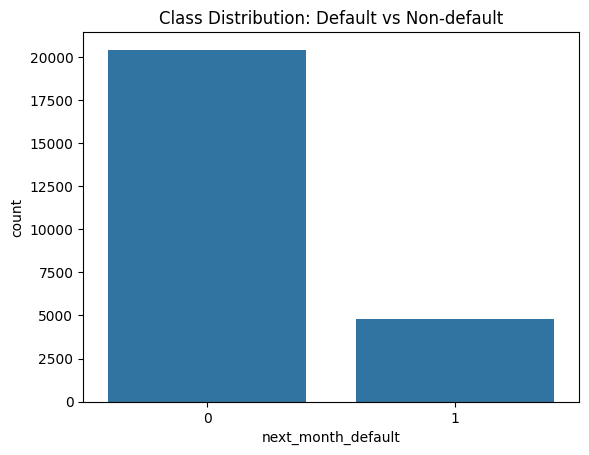

next_month_default
0    0.809601
1    0.190399
Name: proportion, dtype: float64


In [22]:
sns.countplot(x='next_month_default', data=train_data)
plt.title('Class Distribution: Default vs Non-default')
plt.show()

print(train_data['next_month_default'].value_counts(normalize=True))


In [23]:
train_data.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.558205,0.604111,1.840813,168342.060443,35.431022,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.521965,0.489050,0.749217,129892.784807,9.152635,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,1.000000,0.000000,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,4.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


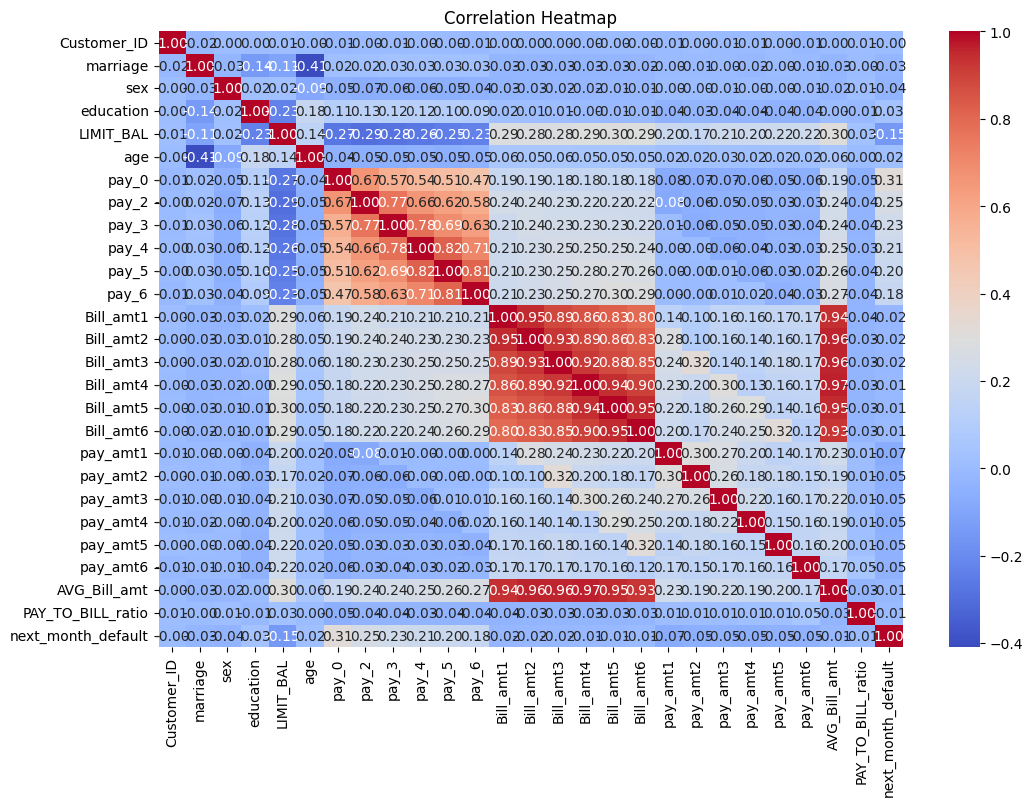

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [26]:
# Calculate correlation of all columns with the target column
target_corr = train_data.corr()['next_month_default'].sort_values(ascending=False)

print("Correlation of features with target (next_month_default):")
print(target_corr)


Correlation of features with target (next_month_default):
next_month_default    1.000000
pay_0                 0.312943
pay_2                 0.252125
pay_3                 0.226015
pay_4                 0.207488
pay_5                 0.196329
pay_6                 0.180387
education             0.032346
age                   0.017703
Customer_ID          -0.001893
PAY_TO_BILL_ratio    -0.005528
Bill_amt6            -0.005725
Bill_amt5            -0.008983
Bill_amt4            -0.012032
AVG_Bill_amt         -0.014694
Bill_amt2            -0.016079
Bill_amt3            -0.016706
Bill_amt1            -0.021729
marriage             -0.029242
sex                  -0.037537
pay_amt5             -0.046960
pay_amt6             -0.047116
pay_amt3             -0.050925
pay_amt2             -0.053623
pay_amt4             -0.053624
pay_amt1             -0.068882
LIMIT_BAL            -0.146010
Name: next_month_default, dtype: float64


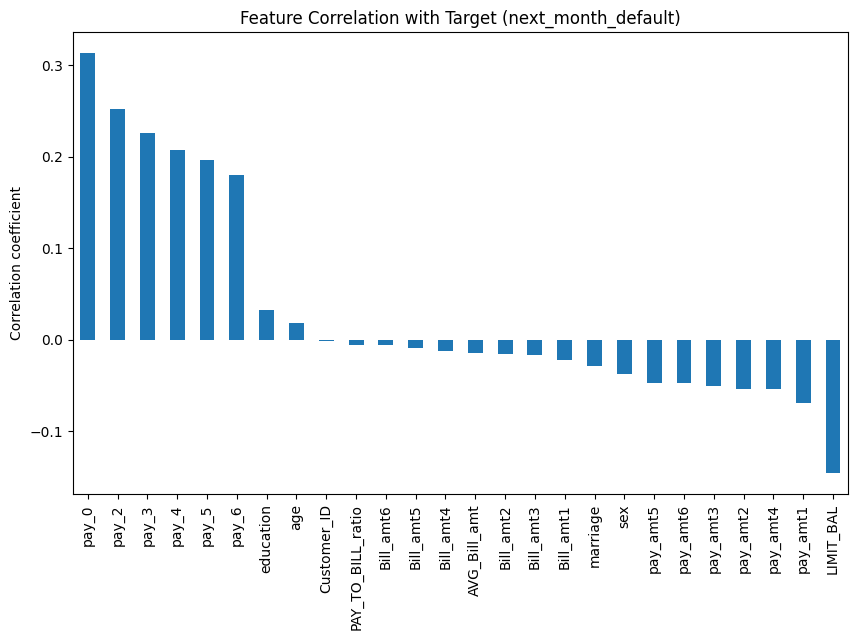

In [27]:
# Exclude the target's correlation with itself
target_corr = target_corr.drop('next_month_default')

plt.figure(figsize=(10,6))
target_corr.plot(kind='bar')
plt.title('Feature Correlation with Target (next_month_default)')
plt.ylabel('Correlation coefficient')
plt.show()

In [44]:
train_data['delinquency_count'] = train_data[pay_cols].apply(lambda row: (row >= 0).sum(), axis=1)

In [36]:
bill_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']
train_data['avg_bill_amt'] = train_data[bill_cols].mean(axis=1)

In [39]:
pay_amt_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
train_data['avg_pay_amt'] = train_data[pay_amt_cols].mean(axis=1)

In [40]:
train_data['utilization_ratio'] = train_data['avg_bill_amt'] / train_data['LIMIT_BAL']

In [41]:
total_bill = train_data[bill_cols].sum(axis=1)
total_payment = train_data[pay_amt_cols].sum(axis=1)

train_data['repayment_ratio'] = total_payment / (total_bill + 1e-6)  # avoid divide-by-zero


In [42]:
train_data['pay_amt_std'] = train_data[pay_amt_cols].std(axis=1)

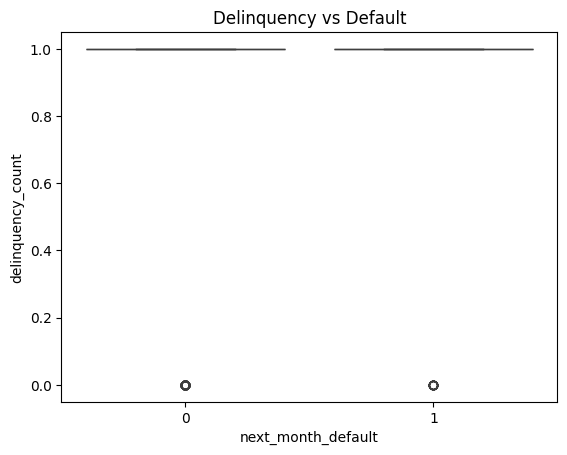

In [45]:
sns.boxplot(x='next_month_default', y='delinquency_count', data=train_data)
plt.title('Delinquency vs Default')
plt.show()

In [46]:
train_data

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default,avg_pay_delay,delinquency_count,avg_bill_amt,avg_pay_amt,utilization_ratio,repayment_ratio,pay_amt_std
0,5017,2,0,2,60000,25.0,2,2,2,0,...,41511.50,0.03,0,0.03,1,41511.498333,1326.185000,0.691858,0.031947,714.956931
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,2534.50,0.27,0,0.27,1,2535.076667,674.998333,0.008742,0.266263,1129.473118
2,5019,1,0,2,180000,63.0,0,0,0,0,...,50422.00,0.04,0,0.04,1,50421.683333,2009.286667,0.280120,0.039850,123.925072
3,5020,1,1,2,210000,43.0,0,0,0,0,...,86229.50,0.04,0,0.04,1,86229.755000,3074.916667,0.410618,0.035660,337.634028
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,11814.33,0.72,0,0.72,1,11814.253333,8552.366667,0.042194,0.723902,17912.037141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,30259,1,1,2,90000,33.0,0,0,0,0,...,82312.50,0.05,0,0.05,1,82313.035000,4496.021667,0.914589,0.054621,1930.339559
25243,30260,1,0,2,60000,49.0,0,0,0,0,...,41371.67,0.14,1,0.14,1,41371.536667,5968.343333,0.689526,0.144262,7879.765467
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,...,3071.83,1.31,1,1.31,1,3071.603333,4035.801667,0.025597,1.313907,3743.889877
25245,30262,1,1,4,390000,40.0,0,0,0,0,...,197278.83,0.03,0,0.03,1,197278.570000,6173.860000,0.505842,0.031295,863.822720


In [47]:
# Calculate correlation of all columns with the target column
target_corr = train_data.corr()['next_month_default'].sort_values(ascending=False)

print("Correlation of features with target (next_month_default):")
print(target_corr)

Correlation of features with target (next_month_default):
next_month_default    1.000000
pay_0                 0.312943
pay_2                 0.252125
pay_3                 0.226015
pay_4                 0.207488
pay_5                 0.196329
pay_6                 0.180387
utilization_ratio     0.111870
education             0.032346
age                   0.017703
delinquency_count     0.004690
Customer_ID          -0.001893
repayment_ratio      -0.003235
PAY_TO_BILL_ratio    -0.005528
avg_pay_delay        -0.005539
Bill_amt6            -0.005725
Bill_amt5            -0.008983
Bill_amt4            -0.012032
avg_bill_amt         -0.014674
AVG_Bill_amt         -0.014694
Bill_amt2            -0.016079
Bill_amt3            -0.016706
Bill_amt1            -0.021729
marriage             -0.029242
sex                  -0.037537
pay_amt5             -0.046960
pay_amt6             -0.047116
pay_amt3             -0.050925
pay_amt2             -0.053623
pay_amt4             -0.053624
pay_amt_std 

In [48]:
from sklearn.model_selection import train_test_split

X = train_data.drop(['next_month_default', 'Customer_ID'], axis=1)
y = train_data['next_month_default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [50]:
import pandas as pd

# Before SMOTE
print("Before balancing:")
print(y_train.value_counts())
print("\nClass distribution (percentage):")
print(y_train.value_counts(normalize=True) * 100)

# After SMOTE
print("\nAfter SMOTE:")
print(pd.Series(y_train_balanced).value_counts())
print("\nClass distribution (percentage):")
print(pd.Series(y_train_balanced).value_counts(normalize=True) * 100)


Before balancing:
next_month_default
0    16352
1     3845
Name: count, dtype: int64

Class distribution (percentage):
next_month_default
0    80.962519
1    19.037481
Name: proportion, dtype: float64

After SMOTE:
next_month_default
0    16352
1    16352
Name: count, dtype: int64

Class distribution (percentage):
next_month_default
0    50.0
1    50.0
Name: proportion, dtype: float64


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_balanced, y_train_balanced)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_balanced, y_train_balanced)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_balanced, y_train_balanced)


D:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Python\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:58:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict on validation set
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]  # For AUC, threshold tuning

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))


[[3722  366]
 [ 591  371]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4088
           1       0.50      0.39      0.44       962

    accuracy                           0.81      5050
   macro avg       0.68      0.65      0.66      5050
weighted avg       0.79      0.81      0.80      5050

AUC-ROC: 0.7412531124003726


In [58]:
from sklearn.metrics import f1_score
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = []

for t in thresholds:
    y_thresh = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_thresh)
    f1_scores.append(f1)

best_threshold = thresholds[np.argmax(f1_scores)]
print("Best F1 threshold:", best_threshold)


Best F1 threshold: 0.3199999999999999


In [54]:
final_preds = (y_proba >= best_threshold).astype(int)


In [55]:
final_preds

array([0, 0, 1, ..., 1, 0, 0])

In [56]:
f1_score(y_test,final_preds)

0.46702317290552586

In [60]:
from sklearn.metrics import fbeta_score

# Assuming y_true and y_pred are your true and predicted labels
f2 = fbeta_score(y_test,final_preds, beta=2)

In [61]:
f2

0.5107212475633528

In [71]:
validation_data = pd.read_csv("validate_dataset_final.csv")

In [72]:
customer_ids = validation_data['Customer_ID']

In [73]:
validation_data

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,...,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,...,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,...,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,...,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,...,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,5012,1,0,2,240000,51,0,0,0,0,...,106832.47,109060.11,3591.87,3718.80,3797.93,3820.66,3949.01,3976.22,103737.83,0.04
5012,5013,1,1,3,60000,33,0,0,0,0,...,29062.53,28862.41,2100.23,3000.32,1499.86,1499.82,1099.82,1100.18,41858.83,0.04
5013,5014,1,0,1,290000,36,1,-2,-1,-1,...,16725.60,17427.88,0.00,568.10,16165.93,1000.03,1000.05,1000.15,8481.17,0.39
5014,5015,1,1,2,120000,28,0,0,0,0,...,75710.06,77502.18,3283.48,2999.75,5000.26,3000.13,2999.95,4000.04,84492.00,0.04


In [76]:
validation_data.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
count,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,...,5016.000000,5016.000000,5016.000000,5.016000e+03,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000
mean,2508.500000,1.554027,0.606659,1.840909,168977.272727,35.379785,-0.031300,-0.161683,-0.188198,-0.235048,...,41244.782709,39805.868369,5356.196780,6.321958e+03,5420.142849,5150.979306,4926.404159,5148.384402,46054.169703,0.417159
std,1448.138806,0.517560,0.488540,0.794177,129478.787500,9.206542,1.116011,1.178731,1.172155,1.129667,...,62255.394325,60698.632561,13660.489329,2.920905e+04,17011.204561,17376.949234,17085.022267,16879.411346,65214.851897,13.729586
min,1.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-10897.000000,-546.930000
25%,1254.750000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1755.395000,1205.210000,1000.047500,9.899050e+02,403.265000,278.172500,299.310000,156.382500,4905.665000,0.040000
50%,2508.500000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17953.255000,17054.315000,2093.655000,2.000410e+03,1845.425000,1500.120000,1500.155000,1453.210000,20933.415000,0.090000
75%,3762.250000,2.000000,1.000000,2.000000,240000.000000,41.250000,0.000000,0.000000,0.000000,0.000000,...,50175.052500,49070.565000,5029.505000,5.000323e+03,4883.887500,4282.550000,4097.725000,4000.095000,56573.540000,0.570000
max,5016.000000,3.000000,1.000000,6.000000,800000.000000,75.000000,8.000000,7.000000,7.000000,7.000000,...,547880.830000,513798.830000,323014.110000,1.684259e+06,371717.910000,432129.910000,426529.180000,260000.100000,548854.330000,797.000000


In [78]:
validation_data.isnull().sum()

Customer_ID          0
marriage             0
sex                  0
education            0
LIMIT_BAL            0
age                  0
pay_0                0
pay_2                0
pay_3                0
pay_4                0
pay_5                0
pay_6                0
Bill_amt1            0
Bill_amt2            0
Bill_amt3            0
Bill_amt4            0
Bill_amt5            0
Bill_amt6            0
pay_amt1             0
pay_amt2             0
pay_amt3             0
pay_amt4             0
pay_amt5             0
pay_amt6             0
AVG_Bill_amt         0
PAY_TO_BILL_ratio    0
dtype: int64

In [79]:
validation_data['education'].value_counts()


education
2    2374
1    1796
3     760
5      54
4      20
6      10
0       2
Name: count, dtype: int64

In [81]:
validation_data['marriage'].value_counts()

marriage
2    2702
1    2262
3      43
0       9
Name: count, dtype: int64

In [82]:
validation_data['education'] = validation_data['education'].replace([0, 5, 6], 4)
validation_data['marriage'] = validation_data['marriage'].replace(0, 3)


In [83]:
validation_data['delinquency_count'] = validation_data[pay_cols].apply(lambda row: (row > 0).sum(), axis=1)

In [84]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
bill_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']
pay_amt_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']


In [85]:
validation_data['avg_pay_delay'] = validation_data[pay_cols].apply(lambda row: row[row > 0].mean() if any(row > 0) else 0, axis=1)

validation_data['avg_bill_amt'] = validation_data[bill_cols].mean(axis=1)
validation_data['avg_pay_amt'] = validation_data[pay_amt_cols].mean(axis=1)
validation_data['utilization_ratio'] = validation_data['avg_bill_amt'] / validation_data['LIMIT_BAL']
total_bill = validation_data[bill_cols].sum(axis=1)
total_payment = validation_data[pay_amt_cols].sum(axis=1)
validation_data['repayment_ratio'] = total_payment / (total_bill + 1e-6)
validation_data['pay_amt_std'] = validation_data[pay_amt_cols].std(axis=1)

In [104]:
feature_cols = X_train.columns.tolist()

X_test = X_test[feature_cols]


In [105]:
y_test_proba = xgb.predict_proba(X_test)[:, 1]
test_preds = (y_test_proba >= 0.32).astype(int)

In [106]:
test_preds

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
submission = pd.DataFrame({
    'Customer': customer_ids,
    'next_month_default': test_preds
})


In [108]:
submission.to_csv("submission.csv", index=False)